# Pima Indians Diabetes Dataset

## Introduction

This exploratory data analysis investigates the **Pima Indians Diabetes Dataset**, sourced from [Kaggle](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database). It includes diagnostic measurements from female patients of Pima Indian heritage aged 21 and above. 


### Objective
The goal is to explore which factors are most associated with diabetes, helping guide potential predictive modeling.

### Dataset Overview
- **Observations**: 768
- **Features**: 8 medical measurements which includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
- **Target**: `Outcome` (1 = diabetic, 0 = non-diabetic)

### Hypothesis
We hypothesize that **high glucose levels, higher BMI, and age** are positively associated with the presence of diabetes.

## Data Loading and Cleaning

Import pandas and some other useful modules:

In [1]:
import pandas as pd
import os
from pathlib import Path

# Start in a reasonable base directory
root_dir = Path(os.getcwd()).parents[1]
csv = root_dir / "data/diabetes-pima/diabetes.csv"

### Load and Preview the Dataset

We begin by loading the dataset and reviewing its structure using `.head()`, `.info()`, and `.describe()` to understand the variables, datatypes, and summary statistics.

In [2]:
df = pd.read_csv(csv)

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Check for Missing or Invalid Values

Although we have no NaN values, some features contain biologically implausible values (e.g., a BMI of 0), which likely represent missing data. We check how often each occurs in relevant columns.

In [6]:
invalid_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
(df[invalid_zero_cols] == 0).sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### Class Distribution of the Outcome Variable

The `Outcome` variable is our target: 1 represents diabetes, and 0 represents no diabetes.

We examine the distribution of this variable to check for class imbalance.

In [7]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [8]:
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

268 of the 768 total outcomes is positive, which is about %35. So we have a moderate class imbalance

### Summary of Data Quality

- Several features contain suspicious 0 values (e.g., 0 BMI or Glucose), suggesting missing entries that require cleaning.
- The Insulin and SkinThickness columns contain the most amount of missing measurements with 374 and 227 respectively.
- The dataset has a moderate class imbalance, with 65% non-diabetic and 35% diabetic patients.
- No obvious missing data in terms of `NaN` or null values, but some implicit missing values are represented as zeroes.

### Cleaning Invalid Zero Values

For the columns where 0 is an invalid value we will replace 0 with NaN:

In [9]:
import numpy as np

In [10]:
df[invalid_zero_cols] = df[invalid_zero_cols].replace(0, np.nan)

In [11]:
df[invalid_zero_cols].isna().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### Handle Missing Values

To preserve dataset size and avoid skewing statistics, we will now impute missing values in key columns with their respective **medians**. This maintains distribution shape and reduces the effect of outliers.

In [12]:
df_imputed = df.copy()
for col in invalid_zero_cols:
    median = df_imputed[col].median()
    df_imputed[col] = df_imputed[col].fillna(median)

In [13]:
df_imputed.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Cleaning Summary

- Replaced biologically implausible zeros in 5 columns with `NaN`.
- Missing values were imputed using median values.
- This preserves the dataset size and ensures more accurate statistical summaries in the next analysis steps.

## Univariate Analysis

### Distribution Analysis (Histograms)

We use histograms to visualize the distribution of each key feature. This helps identify skewness, modality, and unusual gaps or spikes in values.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

We will use the imputed data for our analysis:

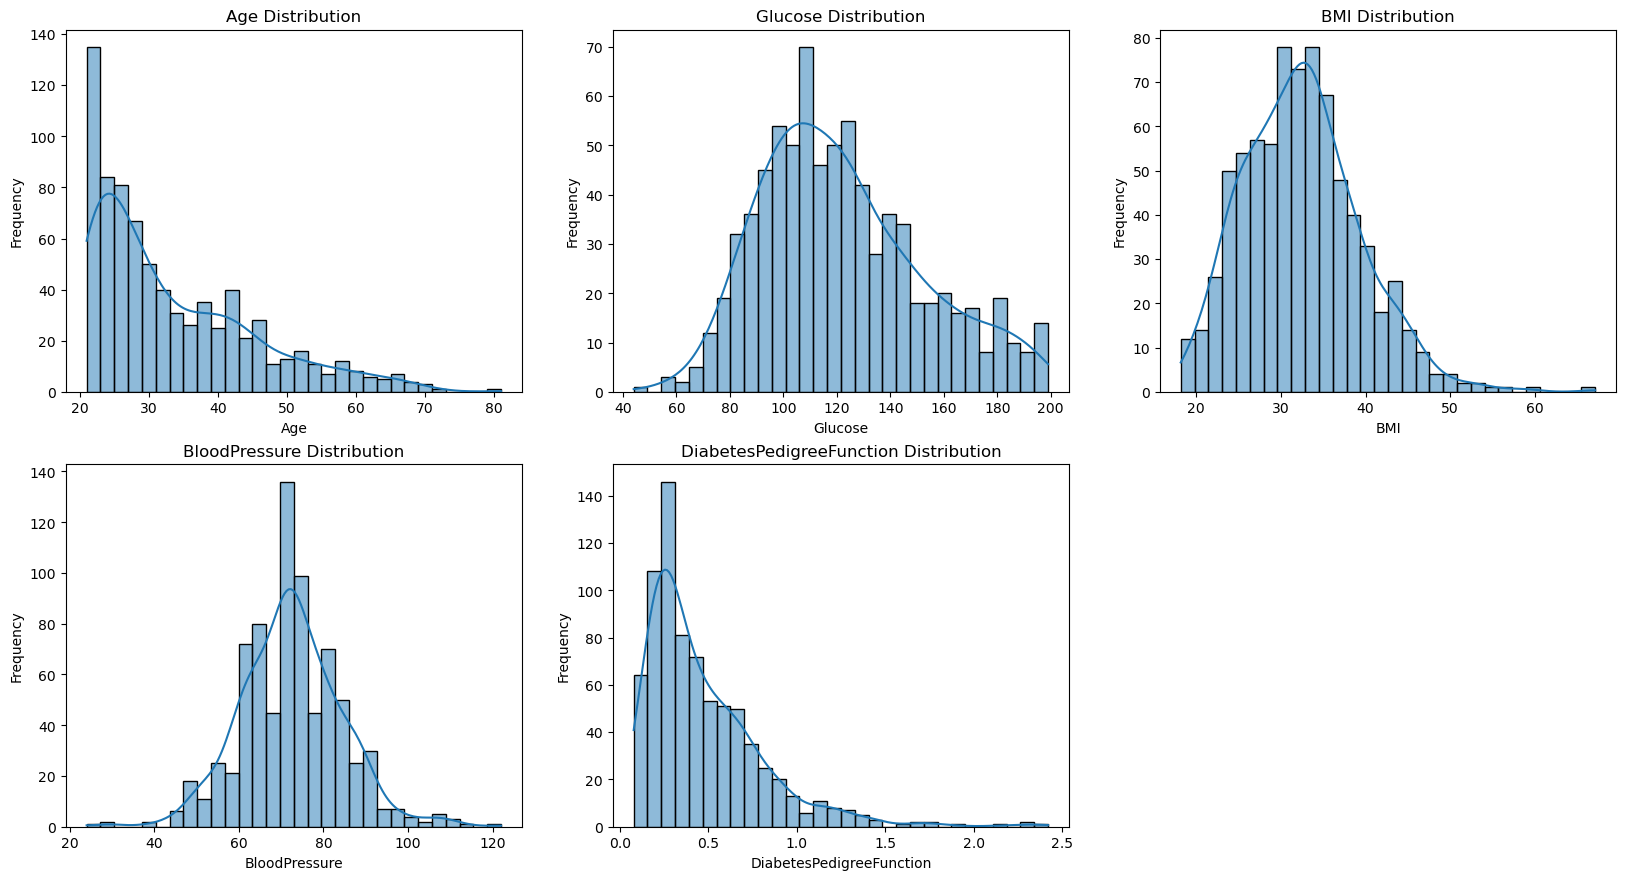

In [15]:
# Histogram of key features
features = ['Age', 'Glucose', 'BMI','BloodPressure', 'DiabetesPedigreeFunction',]
plt.figure(figsize=(20,16))
for i, feature in enumerate(features):
    plt.subplot(3,3, i + 1)
    sns.histplot(df_imputed[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.show()

#### Observations

- **Glucose** is right-skewed, with most values between **90 and 140 mg/dL**. This range aligns with what is considered normal in oral glucose tolerance tests
  
- **BMI** is also right-skewed, with the majority of individuals falling between **30 and 40** — placing most of the population in the **overweight to obese** category.

- **Age** shows a strongly right-skewed distribution. Most patients are in their **20s to 40s**, indicating a relatively **young adult** population.

- **BloodPressure** is fairly **symmetric**, centered around the normal physiological range (~70–80 mmHg). However, a few **low-end values** may reflect previously invalid entries (originally zeros) that were imputed.

In [16]:
df_imputed[features].skew()

Age                         1.129597
Glucose                     0.535587
BMI                         0.599233
BloodPressure               0.141885
DiabetesPedigreeFunction    1.919911
dtype: float64

#### Skewness

The skewness values confirm visual inspection:
- Age is highly skewed.
- Glucose and BMI is moderately skewed.
- BloodPressure is closer to symmetric.

### Outlier Detection (Boxplots)

Boxplots show potential outliers in the distribution. These may influence the mean and affect models sensitive to outliers.

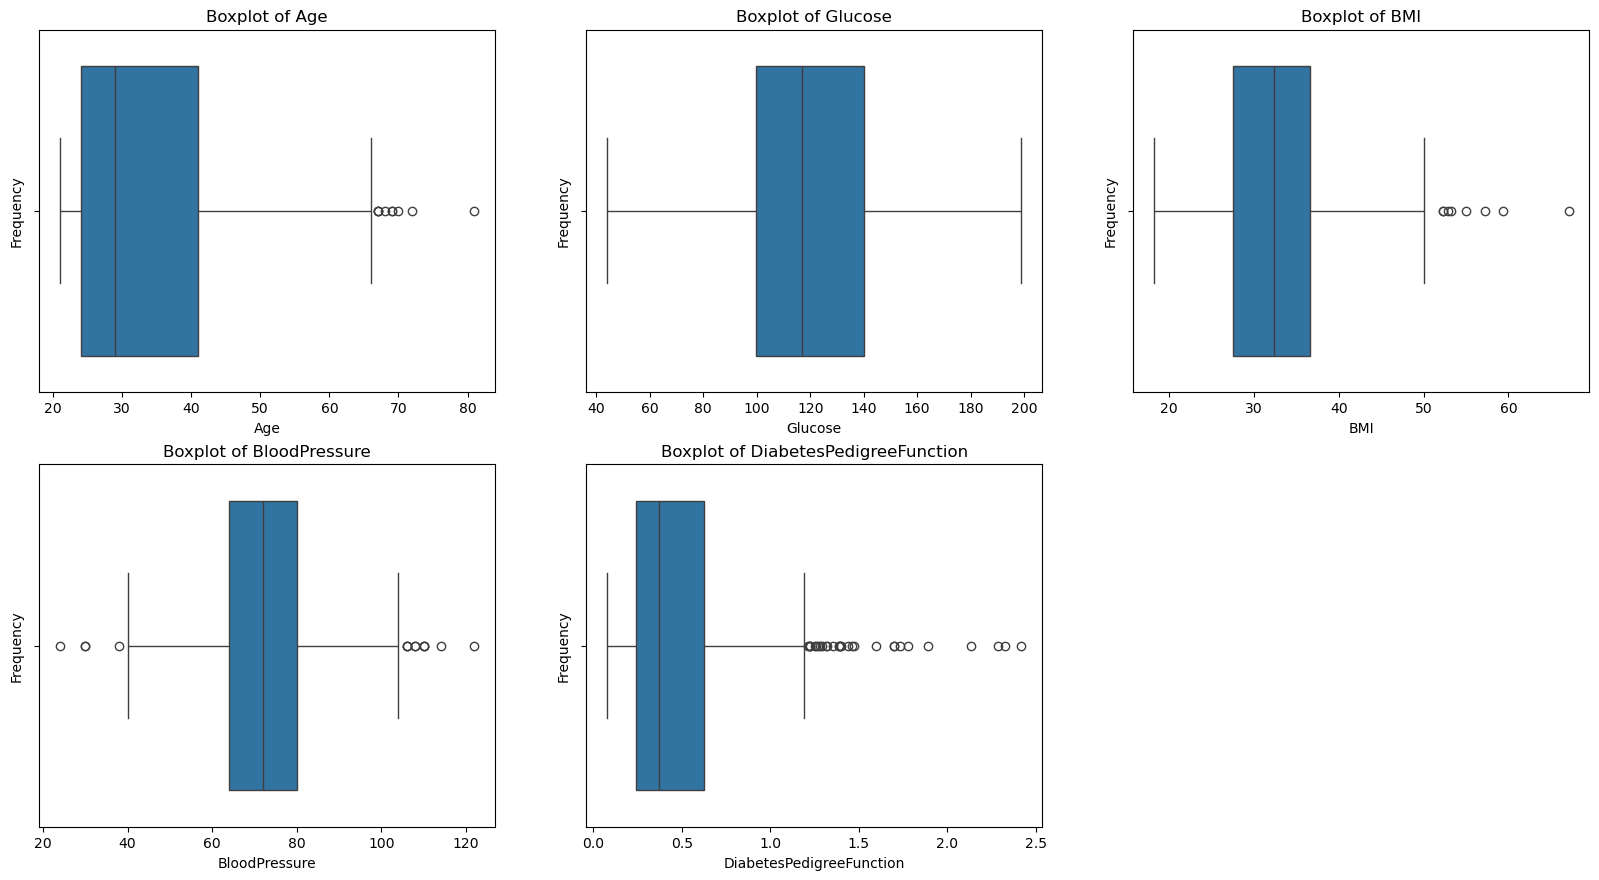

In [17]:
plt.figure(figsize=(20, 16))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_imputed[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.show()

#### Boxplot Insights:

- **Diabetes Pedigree Function (DPF)** shows a substantial number of outliers on the high end, indicating that while most patients have a low genetic risk, a few exhibit unusually high values that may influence the mean.
- **BMI** and **Age** have a few upper outliers. Notably, the boxplot for Age confirms that **more than 50% of patients are younger than 30**, emphasizing the youth of the population
- **Glucose** is symmetrically distributed with few mild outliers. 
- **Blood Pressure** contains some extreme lower outliers after the imputation, they seem improbable from a medical standpoint.

### Imputed Data Visualization

Since both Insulin and SkinThickness had large number of implausiable values which we replaced with the median, their graphs are now dominated by the median values.

Visualizing their pre-imputed data seems more reasonable.

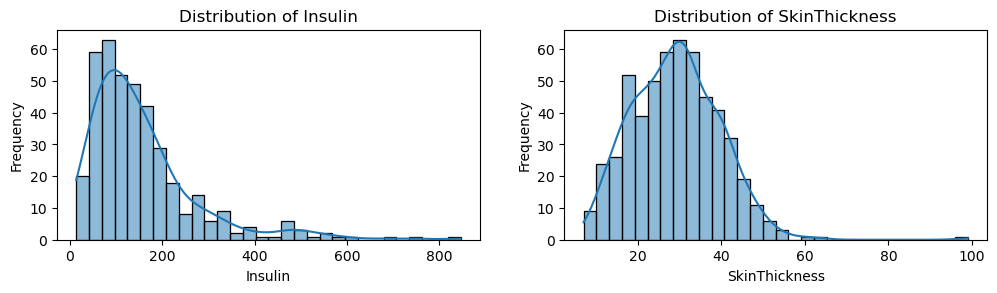

In [18]:
imputed_columns = ["Insulin","SkinThickness"]
plt.figure(figsize=(12,6))
for i, col in enumerate(imputed_columns):
    plt.subplot(2,2, i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.show()

Imputed histogram for reference:

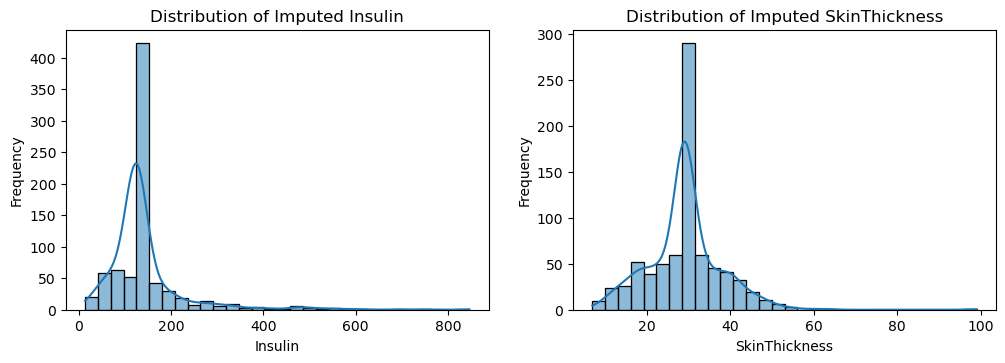

In [19]:
plt.figure(figsize=(12,8))
for i, col in enumerate(imputed_columns):
    plt.subplot(2,2, i+1)
    sns.histplot(df_imputed[col], kde=True, bins=30)
    plt.title(f"Distribution of Imputed {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.show()

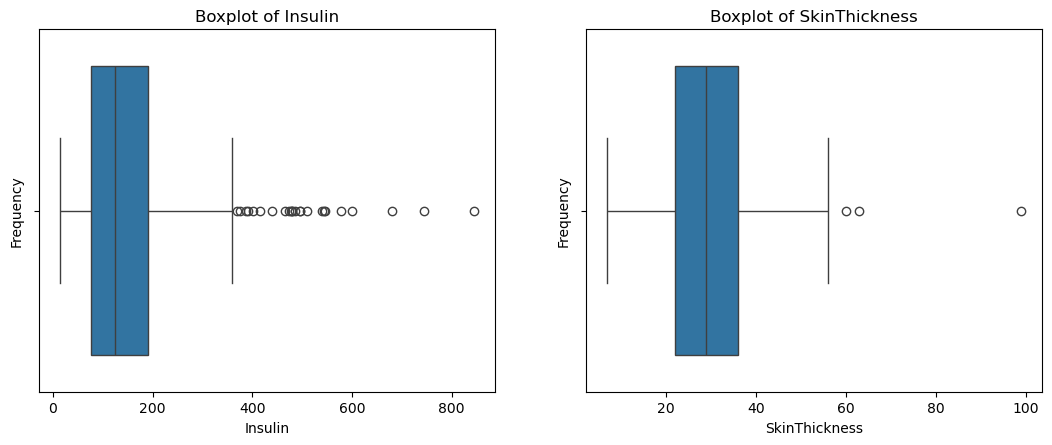

In [20]:
plt.figure(figsize=(20, 16))
for i, col in enumerate(imputed_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.show()

Imputed version of the boxplot:

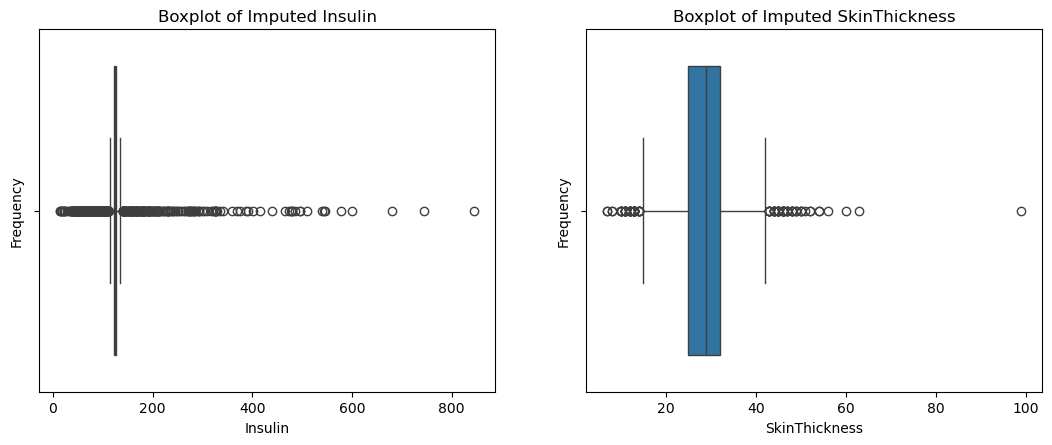

In [21]:
plt.figure(figsize=(20, 16))
for i, col in enumerate(imputed_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_imputed[col])
    plt.title(f'Boxplot of Imputed {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.show()

#### Observations on Imputed Features: Insulin & SkinThickness

The original dataset contained many zero entries in `Insulin` and `SkinThickness`. After replacing these with the median:

- The distributions exhibit artificial spikes at the imputed median.
- Boxplots are distorted and no longer represent natural variance.
- These visual artifacts reduce interpretability in EDA.

The question of what to do with these values depends on the model we will employ.

## Bivariate Analysis

### Correlation Heatmap

We compare feature correlations **before and after imputation**, using Pearson correlation coefficients.

This helps identify:
- Multicollinearity (features that are highly correlated with each other)
- Which features are most associated with diabetes (`Outcome`)

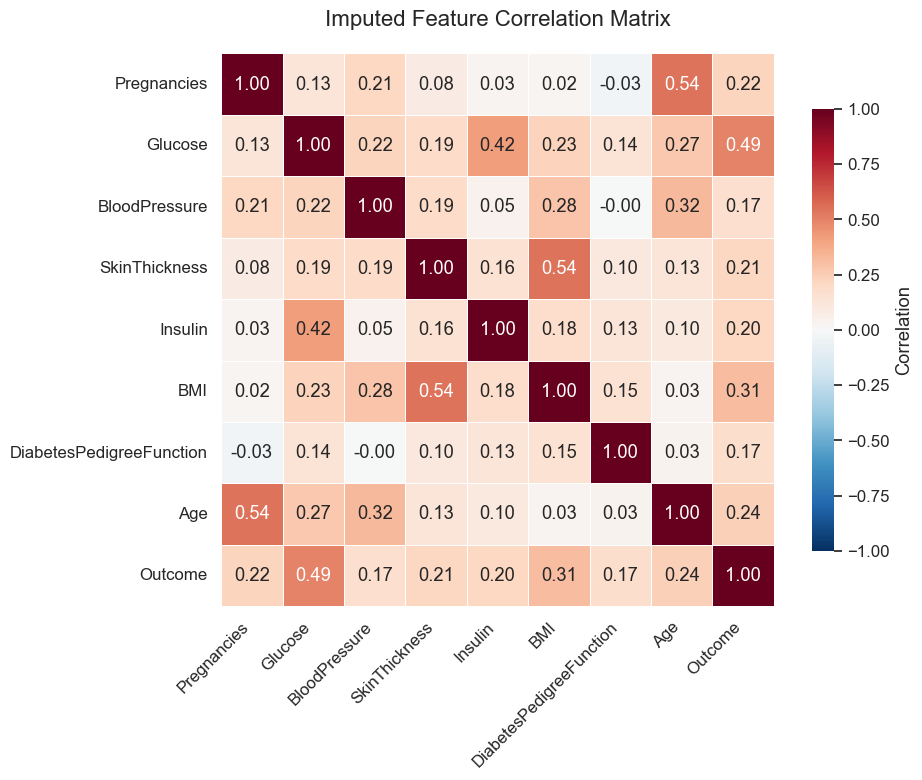

In [22]:
# Set larger, readable style
sns.set_theme(style="white", font_scale=1.1)

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    df_imputed.corr(),                         # Correlation matrix
    annot=True,                        # Show correlation values
    fmt=".2f",                         # 2 decimal places
    cmap="RdBu_r",                     # Diverging colormap (better contrast)
    vmin=-1, vmax=1,                   # Full correlation range
    square=True,                       # Square cells for symmetry
    linewidths=0.5,                    # Grid lines
    cbar_kws={"shrink": 0.8, "label": "Correlation"}  # Smaller colorbar + label
)

# Improve layout
plt.xticks(rotation=45, ha='right')    # Rotate x labels for better readability
plt.yticks(rotation=0)                 # Keep y labels horizontal
plt.title("Imputed Feature Correlation Matrix", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


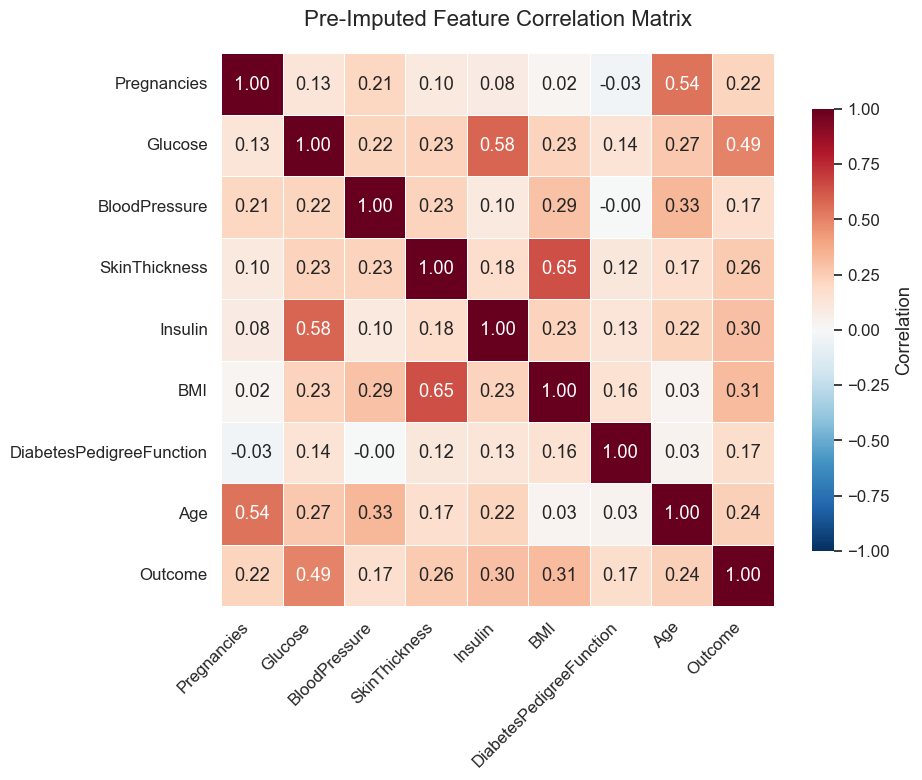

In [23]:
# Set larger, readable style
sns.set_theme(style="white", font_scale=1.1)

# Create the heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(
    df.corr(),                         # Correlation matrix
    annot=True,                        # Show correlation values
    fmt=".2f",                         # 2 decimal places
    cmap="RdBu_r",                     # Diverging colormap (better contrast)
    vmin=-1, vmax=1,                   # Full correlation range
    square=True,                       # Square cells for symmetry
    linewidths=0.5,                    # Grid lines
    cbar_kws={"shrink": 0.8, "label": "Correlation"}  # Smaller colorbar + label
)

# Improve layout
plt.xticks(rotation=45, ha='right')    # Rotate x labels for better readability
plt.yticks(rotation=0)                 # Keep y labels horizontal
plt.title("Pre-Imputed Feature Correlation Matrix", fontsize=16, pad=20)
plt.tight_layout()
plt.show()


#### Observations from the Correlation Heatmaps

- **Glucose** shows the strongest positive correlation with the `Outcome` variable (~0.49), followed by **BMI**, and **Insulin** (pre-imputation). These variables are likely the most predictive.
  
- **Insulin's** correlation with `Outcome` slightly decreases after imputation, likely due to the distortion introduced by filling missing values with the median.

- **BloodPressure** and **DiabetesPedigreeFunction** have the **lowest correlation** with `Outcome`, suggesting limited predictive power in a linear context.

- There are several notable **intracorrelations between features**:
  - **Glucose and Insulin** are moderately to strongly correlated (r = 0.58 pre-imputation), logical due to shared metabolic regulation.
  - **SkinThickness and BMI** show strong positive correlation (r = 0.65 pre-imputation), suggesting collinearity.
  - **Pregnancies and Age** also exhibit a strong positive relationship (r = 0.54), which is expected biologically.

Overall, `Glucose`, `BMI`, and (to a lesser extent) `Insulin` stand out as the strongest candidates for predicting diabetes.

### Feature Means by Outcome Group

We compare the average values of each feature between patients with (`Outcome = 1`) and without (`Outcome = 0`) diabetes. Both pre- and post-imputation values are shown.

In [30]:
df.groupby('Outcome').mean(numeric_only=True).T.sort_values(by=1, ascending=False).round(2).rename_axis("pre-imputed",axis="rows")

Outcome,0,1
pre-imputed,,
Insulin,130.29,206.85
Glucose,110.64,142.32
BloodPressure,70.88,75.32
Age,31.19,37.07
BMI,30.86,35.41
SkinThickness,27.24,33.00
Pregnancies,3.30,4.87
DiabetesPedigreeFunction,0.43,0.55


In [31]:
df_imputed.groupby('Outcome').mean(numeric_only=True).T.sort_values(by=1, ascending=False).round(2).rename_axis("post-imputed",axis="rows")

Outcome,0,1
post-imputed,,
Insulin,127.79,164.70
Glucose,110.68,142.13
BloodPressure,70.92,75.12
Age,31.19,37.07
BMI,30.89,35.38
SkinThickness,27.73,31.69
Pregnancies,3.30,4.87
DiabetesPedigreeFunction,0.43,0.55


#### Observations

- **Glucose** shows the largest and most consistent difference between diabetic and non-diabetic groups.
- **Insulin** shows a noticeable gap pre-imputation, though the effect diminishes post-imputation due to median-filling.
- **BMI** and **Age** are higher on average in the diabetic group.
- **Pregnancies** and **SkinThickness** show moderate average differences.
- **BloodPressure** and **DiabetesPedigreeFunction** exhibit the smallest differences between the two groups.

*Note:* These observations are exploratory. A formal statistical comparison would require hypothesis testing (e.g., t-tests) and effect size estimation (e.g., Cohen’s d).

### Visual Comparisons by Outcome

The plots below compare the distribution of key features between diabetic (`Outcome = 1`) and non-diabetic (`Outcome = 0`) patients.

In [42]:
df_imputed['Outcome Label'] = df_imputed['Outcome'].map({0: 'Non-Diabetic', 1: 'Diabetic'})
key_features = features[:3]

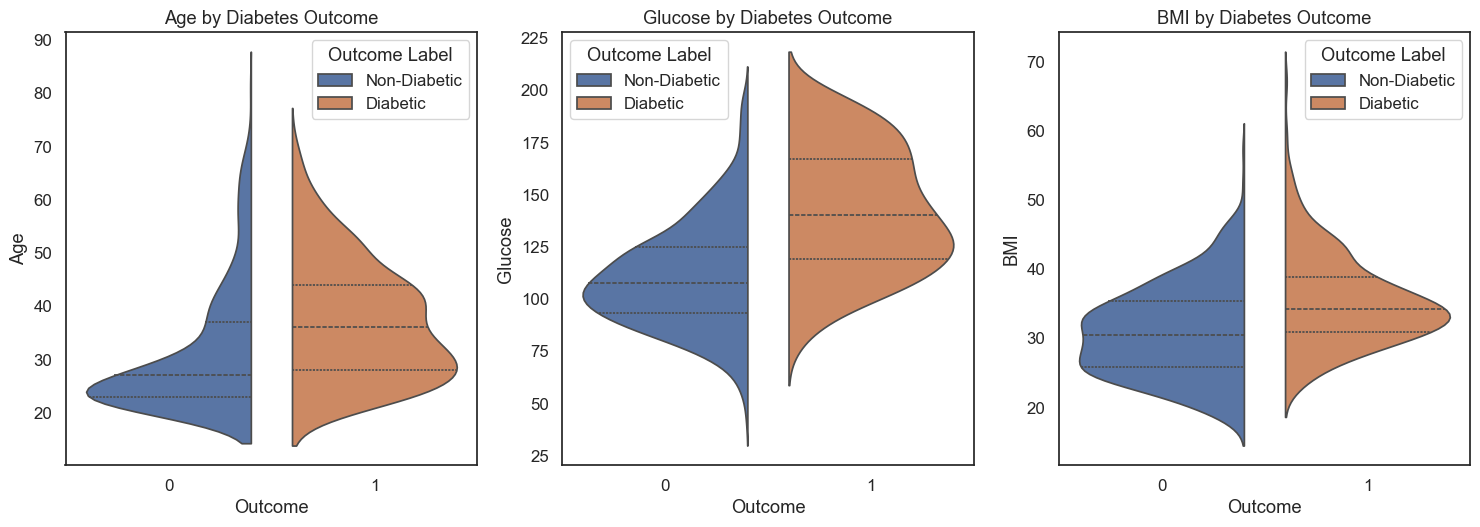

In [43]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(key_features):
    plt.subplot(2, 3, i+1)
    sns.violinplot(data=df_imputed, x='Outcome', y=feature, inner='quart', hue="Outcome Label", split=True)
    plt.title(f'{feature} by Diabetes Outcome')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## Key Findings

Here are some patterns and observations I gathered from exploring the Pima Indians Diabetes dataset. These could help inform future modeling decisions:

1. **Glucose** stood out the most. Diabetic patients consistently had higher glucose levels in both group means and distribution shape. It was the clearest separation between classes.

2. **BMI** and **Age** were also higher in the diabetic group. BMI was more right-skewed, and age showed a shift toward older individuals. Non-diabetics were mostly younger adults.

3. **Insulin** and **SkinThickness** showed some differences before imputation, but after filling missing values with the median, their distributions became hard to interpret. These features may still hold predictive value, but I'm not confident about how to handle them without further testing.

4. **DiabetesPedigreeFunction** and **BloodPressure** had only small differences between groups. They may be weaker predictors on their own.

5. Some features are correlated with each other:
   - `BMI` and `SkinThickness`
   - `Glucose` and `Insulin`
   - `Age` and `Pregnancies`
   This might be important to consider later if multicollinearity becomes an issue in certain models.

**Next Steps:**
- Focus on `Glucose`, `BMI`, and `Age` as likely strong predictors.
- Consider doing proper statistical tests (like t-tests or effect sizes) to back up these observations before moving into modeling.

## Reflection

This exploratory data analysis was both insightful and challenging. Several steps required me to gain a deeper understanding of statistical thinking and data visualization.

- I initially had trouble organizing my Markdown cells to clearly explain what I was doing. As I dug deeper into the underlying concepts, writing explanations became easier and more natural.

- During univariate analysis, I struggled with interpreting the graphs — especially understanding skewness and how it affects the shape and meaning of distributions.

- I had the most difficulty handling missing values. The columns `Insulin` and `SkinThickness` had a majority of missing (zero) entries. I replaced them with their respective median values, taking skewness into account. However, post-imputation, the visualizations became distorted and difficult to interpret. If I were to run a model on this dataset, I’m still unsure how best to handle these imputed columns — whether to keep, transform, or drop them.

- While experimenting with the correlation heatmap, I learned how important it is to create clear, readable visualizations. Small changes in formatting made a big difference in how easy it was to extract insights.

- Creating **violin plots** was a new experience. I appreciated how they show both the distribution shape and key statistics like the median, especially using the split mode to compare classes side by side.

Overall, this notebook was my first real experience with EDA, and I believe I gained valuable insights into both the technical process and how to interpret what the data is telling me.